<a href="https://colab.research.google.com/github/laxmipavan21/aiml/blob/main/images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Train Image Preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 3115 files belonging to 36 classes.


Validation Image Pre Processing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 351 files belonging to 36 classes.


Building the Model

In [ ]:
cnn = tf.keras.models.Sequential()

Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

Compiling and Training

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Saving Model

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 149s 1s/step - loss: 1.0245 - accuracy: 0.7242 - val_loss: 1.1801 - val_accuracy: 0.7607
Epoch 2/32
98/98 [==============================] - 142s 1s/step - loss: 0.9855 - accuracy: 0.7361 - val_loss: 1.3207 - val_accuracy: 0.7607
Epoch 3/32
98/98 [==============================] - 136s 1s/step - loss: 0.9619 - accuracy: 0.7377 - val_loss: 1.1216 - val_accuracy: 0.7778
Epoch 4/32
98/98 [==============================] - 138s 1s/step - loss: 1.0057 - accuracy: 0.7413 - val_loss: 1.1200 - val_accuracy: 0.7920
Epoch 5/32
98/98 [==============================] - 141s 1s/step - loss: 0.8969 - accuracy: 0.7518 - val_loss: 1.1665 - val_accuracy: 0.7863
Epoch 6/32
98/98 [==============================] - 132s 1s/step - loss: 0.8553 - accuracy: 0.7717 - val_loss: 1.1456 - val_accuracy: 0.7863
Epoch 7/32
98/98 [==============================] - 136s 1s/step - loss: 0.7795 - accuracy: 0.7942 - val_loss: 1.1475 - val_accuracy: 0.7806
Epoch 8/32
98

Saving the Model

In [ ]:
cnn.save('training_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Recording the History

In [ ]:
training_history.history

{'loss': [1.0244776010513306,
  0.9855417609214783,
  0.961877167224884,
  1.005658745765686,
  0.8968868255615234,
  0.8553009629249573,
  0.7794706225395203,
  0.7955893874168396,
  0.7824234962463379,
  0.7335810661315918,
  0.7496093511581421,
  0.6822618246078491,
  0.6850053668022156,
  0.6209696531295776,
  0.6611457467079163,
  0.5970975160598755,
  0.5927914977073669,
  0.5802550911903381,
  0.5361241102218628,
  0.5176159143447876,
  0.488834023475647,
  0.503541886806488,
  0.4867347478866577,
  0.4765782654285431,
  0.47078248858451843,
  0.4728911817073822,
  0.4740144610404968,
  0.46938657760620117,
  0.4317176043987274,
  0.41434675455093384,
  0.38562172651290894,
  0.3562580347061157],
 'accuracy': [0.7242375612258911,
  0.736115574836731,
  0.7377207279205322,
  0.7412520051002502,
  0.7518458962440491,
  0.7717496156692505,
  0.7942215204238892,
  0.7829855680465698,
  0.7919743061065674,
  0.8028892278671265,
  0.7951846122741699,
  0.8154093027114868,
  0.82471907

In [ ]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Calculating Accuracy of Model achieved on Validation Set


In [ ]:
print("Validation set accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))


Validation set accuracy: 90.02848863601685 %


Accuracy Visualization

Training Visualization

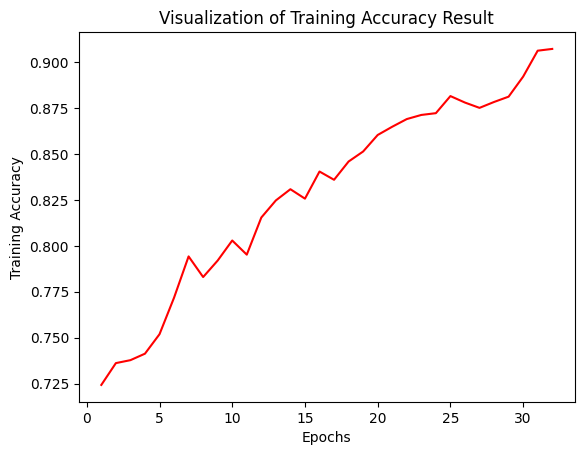

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='r')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

Validation Accuracy

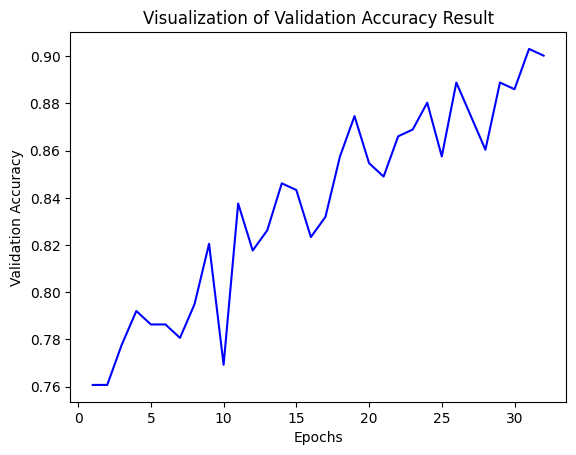

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [ ]:
training_loss,training_accuracy = cnn.evaluate(training_set)

98/98 [==============================] - 99s 940ms/step - loss: 0.2833 - accuracy: 0.9201


In [ ]:
val_loss,val_accuracy = cnn.evaluate(validation_set)

11/11 [==============================] - 15s 570ms/step - loss: 0.8748 - accuracy: 0.9003


Test Set Evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 359 files belonging to 36 classes.


In [ ]:
test_loss,test_accuracy = cnn.evaluate(test_set)

12/12 [==============================] - 13s 273ms/step - loss: 0.8652 - accuracy: 0.8997
